<a href="https://colab.research.google.com/github/ThierrryScotto/trabalho_pratico/blob/main/EDA_IMNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [124]:
!pip install metpy --quiet

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from metpy.calc import heat_index
from metpy.units import units

# Dataset

In [126]:
url = "https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/INMET.csv"

In [127]:
dataset = pd.read_csv(url, sep=";")
dataset

<ipython-input-127-ad7fa1b16750>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(url, sep=";")


,DATA,HORA,PRECIPITACAO_TOTAL_HORARIO_MM,PRESSAO_ATMOSFERICA_NIVEL_ESTACAO_HORARIA_MB,PRESSAO_ATMOSFERICA_MAX.NA_HORA_ANT_AUT_MB,PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_MB,RADIACAO_GLOBAL_KJ_m2,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,TEMPERATURA_PONTO_DE_ORVALHO_C,TEMPERATURA_MAXIMA_NA_HORA_ANT_AUT_C,TEMPERATURA_MINIMA_NA_HORA_ANT_AUT_C,TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT_C,TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT_C,UMIDADE_REL_MAX_NA_HORA_ANT_AUT_%,UMIDADE_REL_MIN_NA_HORA_ANT_AUT_%,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_DIRECAO_HORARIA_GR,VENTO_RAJADA_MAXIMA_M/S,VENTO_VELOCIDADE_HORARIA_M/S,Unnamed: 19
0,2000-09-22,22:00,0,"1014,1","1014,3",1014,13,"15,7","9,8","17,7","15,6","10,9","9,8",70.0,62.0,68.0,106.0,"6,3","2,4",NaN
1,2000-09-22,21:00,0,"1014,3","1014,3",1014,448,"17,8","10,7","19,8","17,8","10,7","9,4",63.0,51.0,63.0,112.0,"4,7","2,2",NaN
2,2000-09-22,20:00,0,1014,1014,"1013,9",1252,"19,8","9,8","21,2","19,7","10,3","6,5",54.0,40.0,52.0,141.0,"4,3","1,7",NaN
3,2000-09-22,19:00,0,1014,"1014,2","1013,9",1924,"20,9","7,4","21,2","20,3","8,3","6,4",45.0,39.0,42.0,295.0,"3,9","1,7",NaN
4,2000-09-22,18:00,0,"1014,1","1014,8","1014,1",2791,"20,9","6,9","21,3","20,2","9,6","6,2",48.0,40.0,40.0,246.0,"5,2","1,1",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211339,2024-10-31,0200 UTC,0,"1009,8",1010,"1009,8",NaN,"20,8","17,9","21,2","20,8","18,2","17,9",84.0,83.0,84.0,117.0,"7,7",2,NaN
211340,2024-10-31,0100 UTC,0,"1009,9",1010,"1009,8",NaN,"21,1","18,2","21,4","21,1","18,4","18,2",84.0,83.0,83.0,114.0,"11,1","2,4",NaN
211341,2024-10-31,2300 UTC,0,"1006,1","1006,2","1005,5",NaN,"22,6","17,5","23,4","22,6","17,9","17,5",74.0,72.0,73.0,125.0,6,2,NaN
211342,2024-10-31,1000 UTC,0,"1009,7","1009,7","1009,1","464,1","21,8","17,7","21,8","19,7",18,"17,3",87.0,78.0,78.0,130.0,"5,3","1,3",NaN


# EDA

In [128]:
features = ['DATA',
            'HORA',
            'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C',
            'RADIACAO_GLOBAL_KJ_m2',
            'UMIDADE_RELATIVA_DO_AR_HORARIA_%',
            'VENTO_VELOCIDADE_HORARIA_M/S']

dataset = dataset[features]

In [129]:
dataset[features]

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,22:00,"15,7",13,68.0,"2,4"
1,2000-09-22,21:00,"17,8",448,63.0,"2,2"
2,2000-09-22,20:00,"19,8",1252,52.0,"1,7"
3,2000-09-22,19:00,"20,9",1924,42.0,"1,7"
4,2000-09-22,18:00,"20,9",2791,40.0,"1,1"
...,...,...,...,...,...,...
211339,2024-10-31,0200 UTC,"20,8",NaN,84.0,2
211340,2024-10-31,0100 UTC,"21,1",NaN,83.0,"2,4"
211341,2024-10-31,2300 UTC,"22,6",NaN,73.0,2
211342,2024-10-31,1000 UTC,"21,8","464,1",78.0,"1,3"


In [130]:
dataset.describe()

,UMIDADE_RELATIVA_DO_AR_HORARIA_%
count,211096.000000
mean,-232.412471
std,1735.624458
min,-9999.000000
25%,63.000000
50%,79.000000
75%,89.000000
max,100.000000


In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211344 entries, 0 to 211343
Data columns (total 6 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   DATA                                    211344 non-null  object 
 1   HORA                                    211344 non-null  object 
 2   TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C  211101 non-null  object 
 3   RADIACAO_GLOBAL_KJ_m2                   187430 non-null  object 
 4   UMIDADE_RELATIVA_DO_AR_HORARIA_%        211096 non-null  float64
 5   VENTO_VELOCIDADE_HORARIA_M/S            211050 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.7+ MB


In [132]:
dataset.isna().sum()

,0
DATA,0
HORA,0
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,243
RADIACAO_GLOBAL_KJ_m2,23914
UMIDADE_RELATIVA_DO_AR_HORARIA_%,248
VENTO_VELOCIDADE_HORARIA_M/S,294


<h3>Problemas a serem resolvidos</h3>

- Pontos vazios
- dados valores inválidos -9999
- Dados númericos como str

## Tratamentos

In [133]:
dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] = dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].str.replace(',', '.').astype(float)
dataset['RADIACAO_GLOBAL_KJ_m2']                  = dataset['RADIACAO_GLOBAL_KJ_m2'].str.replace(',', '.').astype(float)
dataset['VENTO_VELOCIDADE_HORARIA_M/S']           = dataset['VENTO_VELOCIDADE_HORARIA_M/S'].str.replace(',', '.').astype(float)

<ipython-input-133-d8c30489b29d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] = dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].str.replace(',', '.').astype(float)
<ipython-input-133-d8c30489b29d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RADIACAO_GLOBAL_KJ_m2']                  = dataset['RADIACAO_GLOBAL_KJ_m2'].str.replace(',', '.').astype(float)
<ipython-input-133-d8c30489b29d>:3: SettingWithCopyWarning: 
A value is trying to be set 

In [134]:
dataset = dataset.replace(-9999.0, np.nan)

In [135]:
dataset.describe()

,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
count,204641.000000,94528.000000,204634.000000,203614.000000
mean,19.965591,1210.119407,76.000054,1.537382
std,5.704715,1073.503815,15.736912,1.016877
min,0.400000,0.000000,15.000000,0.000000
25%,16.100000,225.000000,65.000000,0.800000
50%,20.100000,961.000000,79.000000,1.400000
75%,23.700000,2026.025000,89.000000,2.100000
max,40.200000,3999.900000,100.000000,13.300000


In [136]:
dataset.isna().sum()

,0
DATA,0
HORA,0
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,6703
RADIACAO_GLOBAL_KJ_m2,116816
UMIDADE_RELATIVA_DO_AR_HORARIA_%,6710
VENTO_VELOCIDADE_HORARIA_M/S,7730


### Verificando as datas

In [137]:
dataset['DATA'] = pd.to_datetime(dataset['DATA'])

In [138]:
dataset['DATA']

,DATA
0,2000-09-22
1,2000-09-22
2,2000-09-22
3,2000-09-22
4,2000-09-22
...,...
211339,2024-10-31
211340,2024-10-31
211341,2024-10-31
211342,2024-10-31


Verificando se a sequencia das datas estão corretas

In [139]:
start_date = dataset['DATA'].min()
end_date = dataset['DATA'].max()
complete_dates = pd.date_range(start=start_date, end=end_date)

datas_faltantes = complete_dates.difference(dataset['DATA'])

print("Datas faltantes:")
print(datas_faltantes)

Datas faltantes:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### Plot

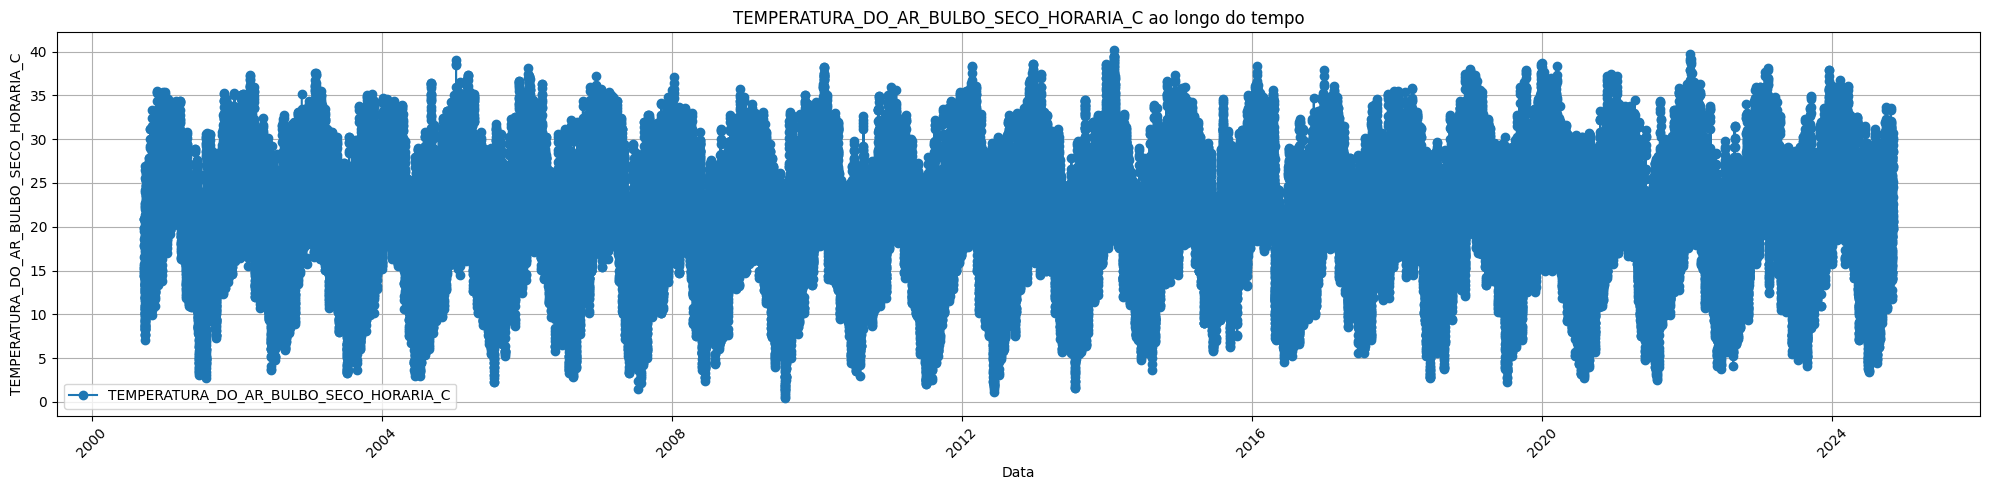

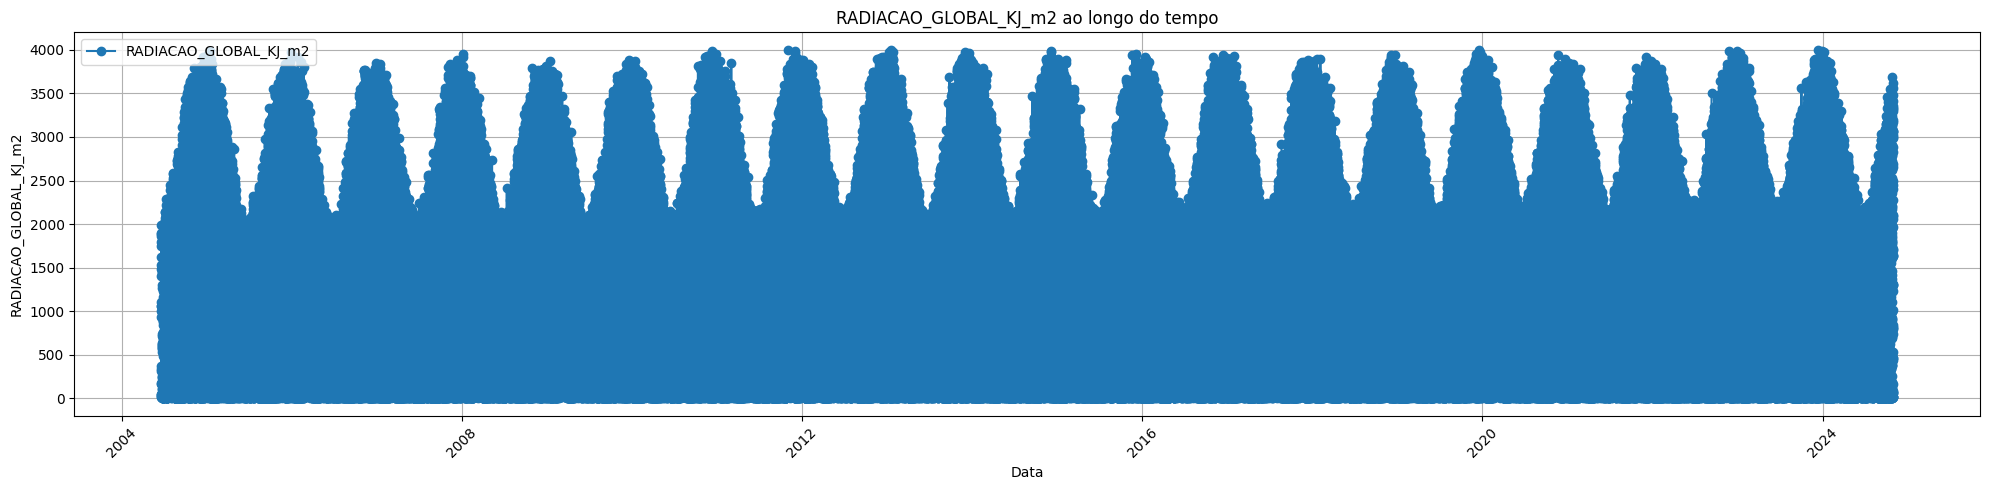

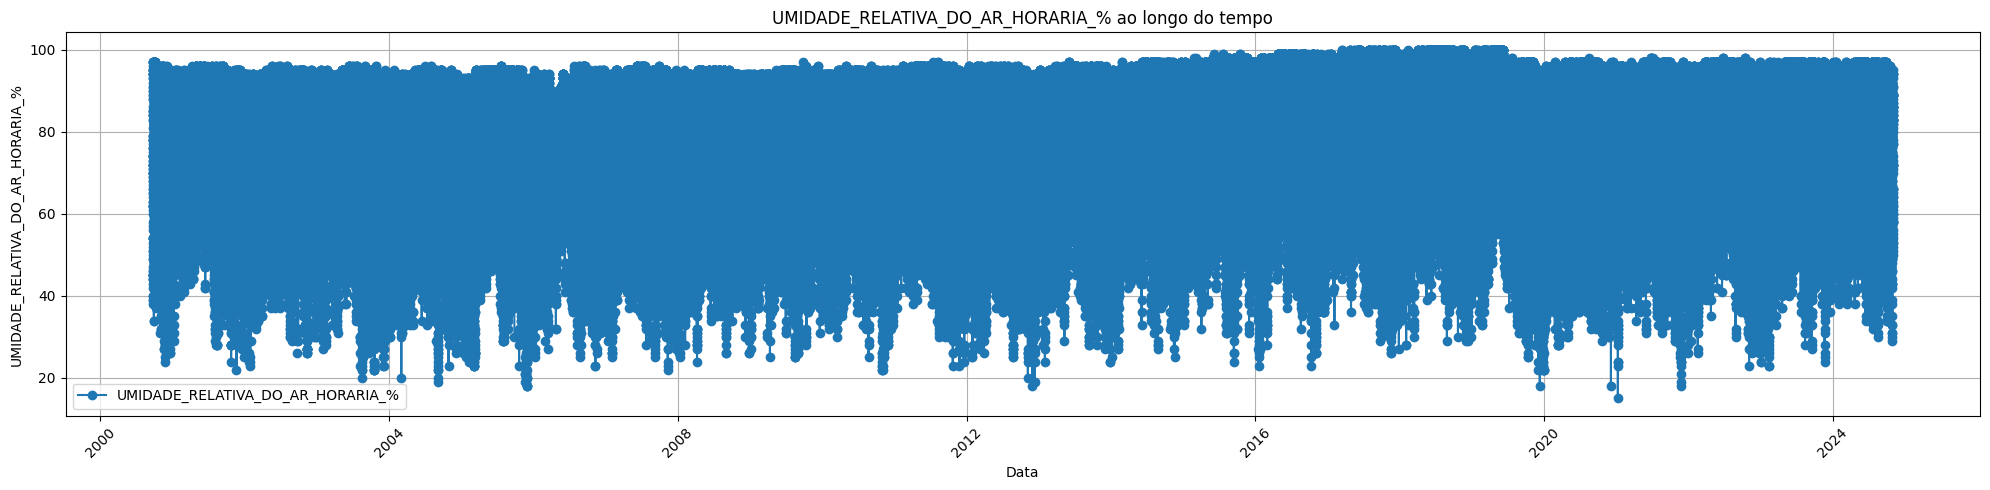

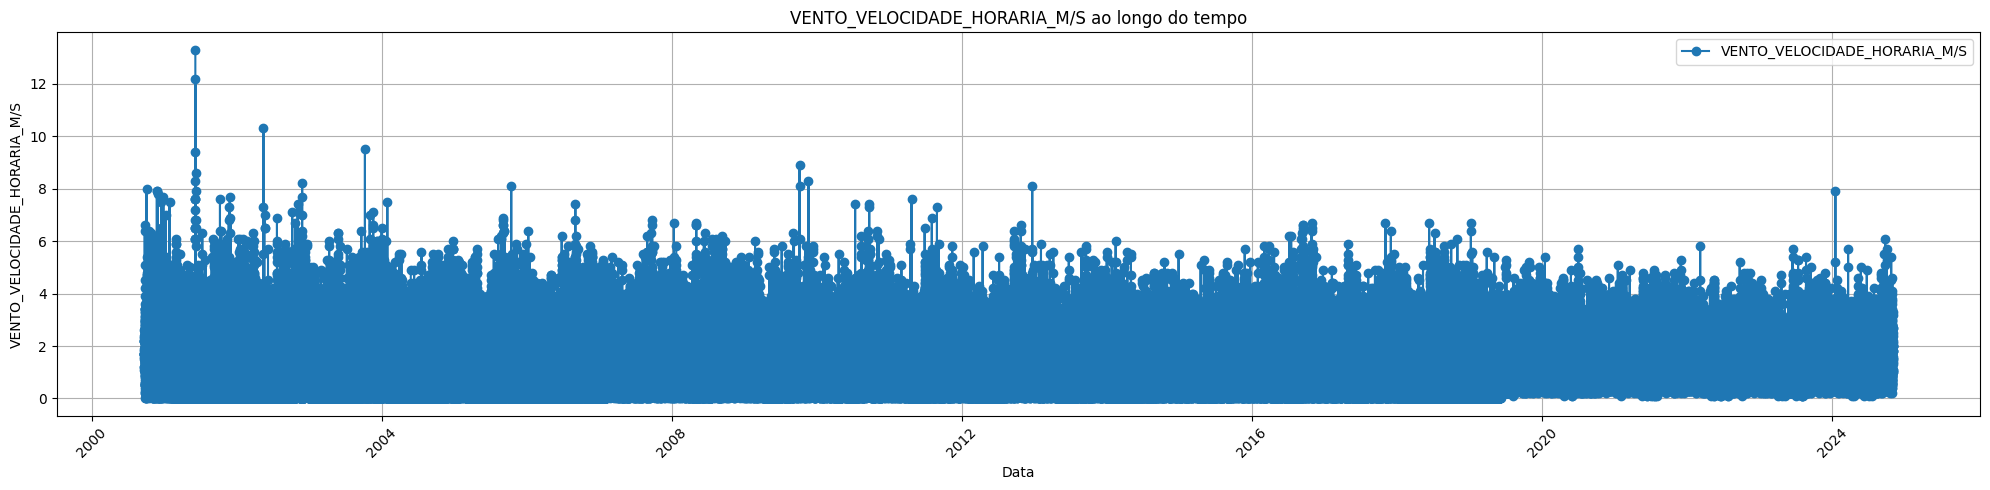

In [140]:
columns = ['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C',
            'RADIACAO_GLOBAL_KJ_m2',
            'UMIDADE_RELATIVA_DO_AR_HORARIA_%',
            'VENTO_VELOCIDADE_HORARIA_M/S']

for variavel in columns:
    plt.figure(figsize=(20, 5))
    plt.plot(dataset['DATA'], dataset[variavel], marker='o', label=variavel)
    plt.title(f'{variavel} ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel(variavel)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Missing data

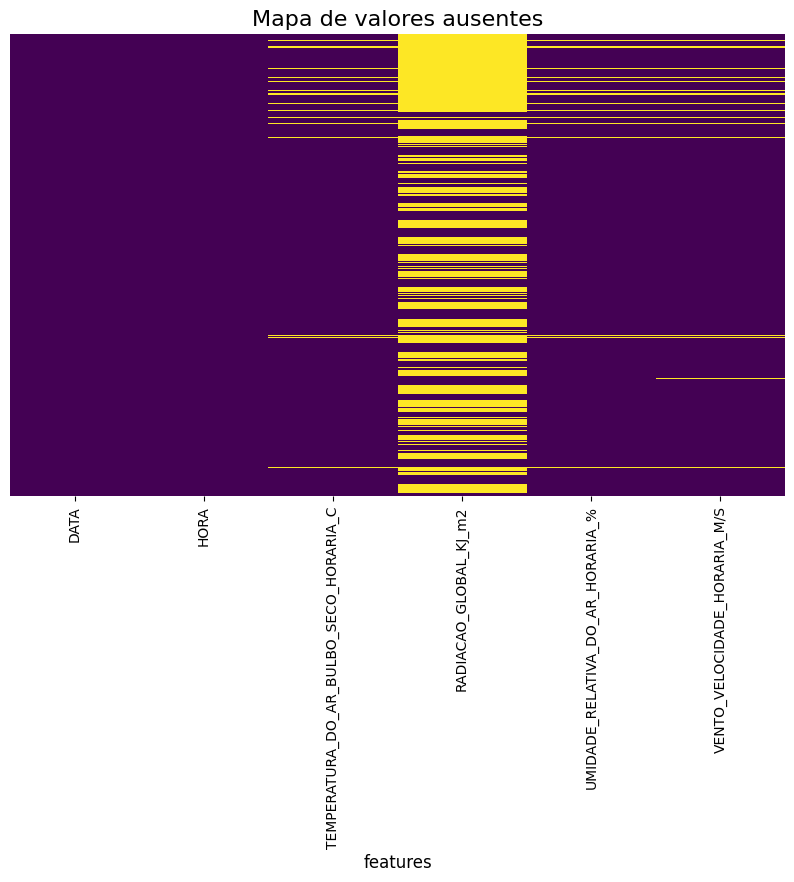

In [141]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de valores ausentes', fontsize=16)
plt.xlabel('features', fontsize=12)
plt.show()

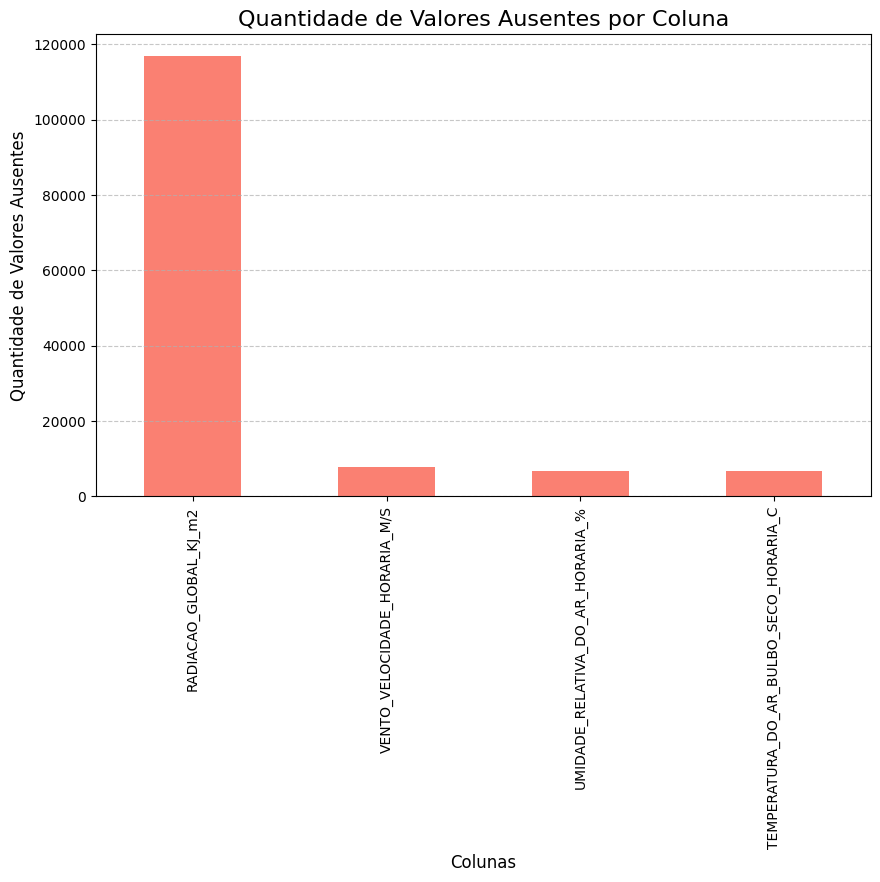

In [142]:
missing_data = dataset.isnull().sum()

plt.figure(figsize=(10, 6))
missing_data[missing_data > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Quantidade de Valores Ausentes por Coluna', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Quantidade de Valores Ausentes', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [143]:
len(dataset['RADIACAO_GLOBAL_KJ_m2'])

211344

In [144]:
radiacao = (dataset['RADIACAO_GLOBAL_KJ_m2'].count() / dataset['RADIACAO_GLOBAL_KJ_m2'].isna().sum()) * 100
temp     = (dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].isna().sum() / dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].count()) * 100
umidade  = (dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%'].isna().sum() / dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%'].count()) * 100
vento    = (dataset['VENTO_VELOCIDADE_HORARIA_M/S'].isna().sum() / dataset['VENTO_VELOCIDADE_HORARIA_M/S'].count()) * 100

print(f'Radiacao: {radiacao:.2f}%')
print(f'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C: {temp:.2f}%')
print(f'UMIDADE_RELATIVA_DO_AR_HORARIA_%: {umidade:.2f}%')
print(f'VENTO_VELOCIDADE_HORARIA_M/S: {vento:.2f}%')

Radiacao: 80.92%
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C: 3.28%
UMIDADE_RELATIVA_DO_AR_HORARIA_%: 3.28%
VENTO_VELOCIDADE_HORARIA_M/S: 3.80%


In [145]:
dataset['DATA']

,DATA
0,2000-09-22
1,2000-09-22
2,2000-09-22
3,2000-09-22
4,2000-09-22
...,...
211339,2024-10-31
211340,2024-10-31
211341,2024-10-31
211342,2024-10-31


## Remover radiação solar

In [146]:
dataset.drop('RADIACAO_GLOBAL_KJ_m2', axis=1, inplace=True)

## Aplicando interpolação polinomial

**Algumas horas estão com valores NAN**

In [147]:
none_values = dataset[dataset.isnull().any(axis=1)]
none_values

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
14,2000-09-22,00:00,NaN,NaN,NaN
15,2000-09-22,01:00,NaN,NaN,NaN
16,2000-09-22,02:00,NaN,NaN,NaN
17,2000-09-22,03:00,NaN,NaN,NaN
480,2000-10-12,23:00,NaN,NaN,NaN
...,...,...,...,...,...
207229,2024-05-13,0000 UTC,19.5,97.0,NaN
207564,2024-05-27,1100 UTC,NaN,NaN,NaN
207573,2024-05-27,0900 UTC,NaN,NaN,NaN
207574,2024-05-27,1000 UTC,NaN,NaN,NaN


In [148]:
none_values.head(10)

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
14,2000-09-22,00:00,NaN,NaN,NaN
15,2000-09-22,01:00,NaN,NaN,NaN
16,2000-09-22,02:00,NaN,NaN,NaN
17,2000-09-22,03:00,NaN,NaN,NaN
480,2000-10-12,23:00,NaN,NaN,NaN
481,2000-10-12,22:00,NaN,NaN,NaN
482,2000-10-12,21:00,NaN,NaN,NaN
483,2000-10-12,20:00,NaN,NaN,NaN
484,2000-10-12,19:00,NaN,NaN,NaN
485,2000-10-12,18:00,NaN,NaN,NaN


In [149]:
dataset.head(10)

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,22:00,15.7,68.0,2.4
1,2000-09-22,21:00,17.8,63.0,2.2
2,2000-09-22,20:00,19.8,52.0,1.7
3,2000-09-22,19:00,20.9,42.0,1.7
4,2000-09-22,18:00,20.9,40.0,1.1
5,2000-09-22,17:00,20.9,44.0,1.7
6,2000-09-22,16:00,19.8,45.0,1.2
7,2000-09-22,15:00,19.5,45.0,1.7
8,2000-09-22,14:00,18.6,49.0,1.6
9,2000-09-22,13:00,17.9,62.0,2.3


In [150]:
np.mean(dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C']), np.mean(dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%']), np.mean(dataset['VENTO_VELOCIDADE_HORARIA_M/S'])

(19.965590961732985, 76.00005375450804, 1.5373824982565047)

In [151]:
dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] = dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].interpolate(method="polynomial", order=3)
dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%']       = dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%'].interpolate(method="polynomial", order=3)
dataset['VENTO_VELOCIDADE_HORARIA_M/S']           = dataset['VENTO_VELOCIDADE_HORARIA_M/S'].interpolate(method="polynomial", order=3)

In [152]:
dataset.isna().sum()

,0
DATA,0
HORA,0
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,0
UMIDADE_RELATIVA_DO_AR_HORARIA_%,0
VENTO_VELOCIDADE_HORARIA_M/S,0


In [153]:
np.mean(dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C']), np.mean(dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%']), np.mean(dataset['VENTO_VELOCIDADE_HORARIA_M/S'])

(19.962955627569855, 76.01441975333616, 1.5835555095378584)

## Agrupando dados em dados diários

In [154]:
dataset["HORA"]

,HORA
0,22:00
1,21:00
2,20:00
3,19:00
4,18:00
...,...
211339,0200 UTC
211340,0100 UTC
211341,2300 UTC
211342,1000 UTC


In [159]:
dataset["DATA"]

,DATA
0,2000-09-22
1,2000-09-22
2,2000-09-22
3,2000-09-22
4,2000-09-22
...,...
211339,2024-10-31
211340,2024-10-31
211341,2024-10-31
211342,2024-10-31


In [ ]:
['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C', 'RADIACAO_GLOBAL_KJ_m2', 'UMIDADE_RELATIVA_DO_AR_HORARIA_%', 'VENTO_VELOCIDADE_HORARIA_M/S']

In [161]:
test = dataset.groupby("DATA").max()
test

,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
DATA,,,,
2000-09-22,23:00,20.9,95.987238,2.6
2000-09-23,23:00,26.9,97.000000,2.8
2000-09-24,23:00,18.7,97.000000,6.6
2000-09-25,23:00,14.8,78.000000,5.1
2000-09-26,23:00,17.1,83.000000,3.6
...,...,...,...,...
2024-10-27,2300 UTC,24.9,88.000000,2.8
2024-10-28,2300 UTC,28.0,90.000000,2.8
2024-10-29,2300 UTC,28.9,95.000000,3.0


In [164]:
dataset.head(23)

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,22:00,15.700000,68.000000,2.400000
1,2000-09-22,21:00,17.800000,63.000000,2.200000
2,2000-09-22,20:00,19.800000,52.000000,1.700000
3,2000-09-22,19:00,20.900000,42.000000,1.700000
4,2000-09-22,18:00,20.900000,40.000000,1.100000
5,2000-09-22,17:00,20.900000,44.000000,1.700000
6,2000-09-22,16:00,19.800000,45.000000,1.200000
7,2000-09-22,15:00,19.500000,45.000000,1.700000
8,2000-09-22,14:00,18.600000,49.000000,1.600000
9,2000-09-22,13:00,17.900000,62.000000,2.300000


In [166]:
 test_two = dataset.loc[dataset.groupby("DATA")["TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C"].idxmax()]
 test_two

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
3,2000-09-22,19:00,20.9,42.0,1.7
32,2000-09-23,17:00,26.9,49.0,0.7
61,2000-09-24,02:00,18.7,97.0,0.5
81,2000-09-25,19:00,14.8,39.0,2.4
96,2000-09-26,17:00,17.1,39.0,2.2
...,...,...,...,...,...
211230,2024-10-27,1800 UTC,24.9,31.0,1.8
211250,2024-10-28,1700 UTC,28.0,52.0,1.4
211281,2024-10-29,1800 UTC,28.9,58.0,1.6
211302,2024-10-30,1700 UTC,28.0,58.0,3.3


In [170]:
df_sorted = dataset.sort_values(
    by=["DATA", "TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C", "UMIDADE_RELATIVA_DO_AR_HORARIA_%"],
    ascending=[True, False, False]
)

resultado = df_sorted.groupby("DATA").first().reset_index()

In [172]:
resultado

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,17:00,20.9,44.0,1.7
1,2000-09-23,17:00,26.9,49.0,0.7
2,2000-09-24,02:00,18.7,97.0,0.5
3,2000-09-25,19:00,14.8,39.0,2.4
4,2000-09-26,17:00,17.1,39.0,2.2
...,...,...,...,...,...
8801,2024-10-27,1800 UTC,24.9,31.0,1.8
8802,2024-10-28,1700 UTC,28.0,52.0,1.4
8803,2024-10-29,1800 UTC,28.9,58.0,1.6
8804,2024-10-30,1700 UTC,28.0,58.0,3.3
